# 1. Linear Models 

### Logistic Regression

For the Linear Models we have evaluated so far the outcome variable has been a continous variable. In many situations we want to model a binary outcome (yes/no, disease/no_disease, etc).

Let's review logistic regression by modeling the probability of developing diabetes as a function of age and BMI. 

First lets construct the scatterplot of diabetes status as a function of age. Then let's displays a second scatterplot of diabetes as a function of BMI (body mass index). Note that each subject can either have diabetes or not, so all of the points are displayed at zero or one on the y-axis.

In [25]:

library(dplyr)
library(NHANES)
library(ggplot2)
library(mosaic)
library(swirl)


NHANES <- NHANES %>% 
mutate(has_diabetes = as.numeric(Diabetes == "Yes"))

log_plot <- ggplot(data = NHANES, aes(x = Age, y = has_diabetes)) + 
geom_jitter(alpha = 0.1, height = 0.05) + 
geom_smooth(method = "glm", method.args = list(family = "binomial")) + 
ylab("Diabetes status")



`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 142 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 142 rows containing missing values (geom_point)."


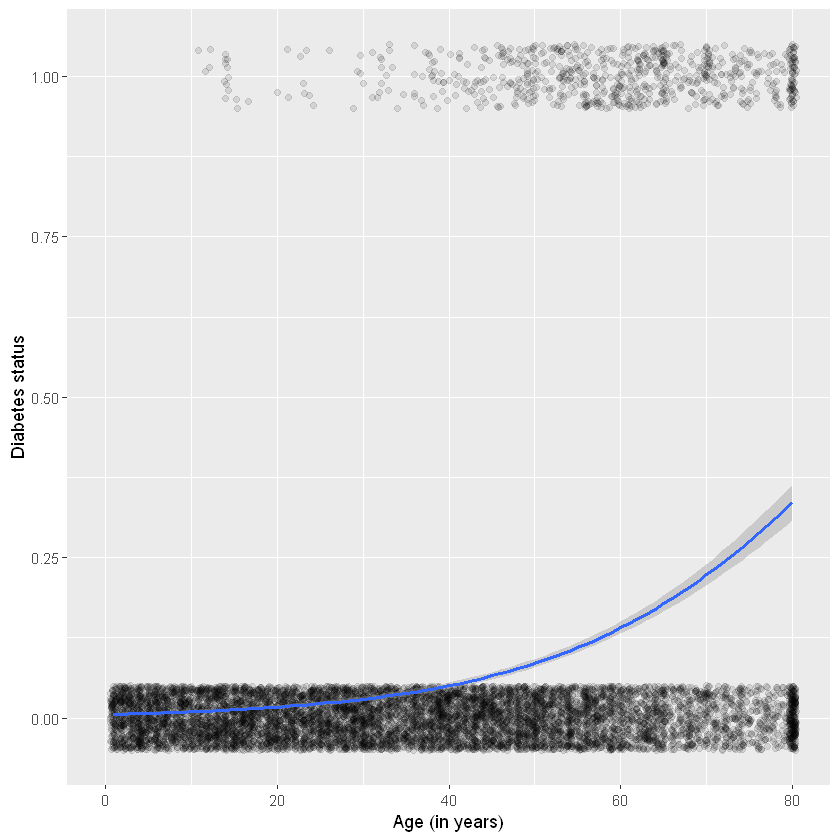

In [26]:
log_plot + xlab("Age (in years)")

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 371 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 371 rows containing missing values (geom_point)."


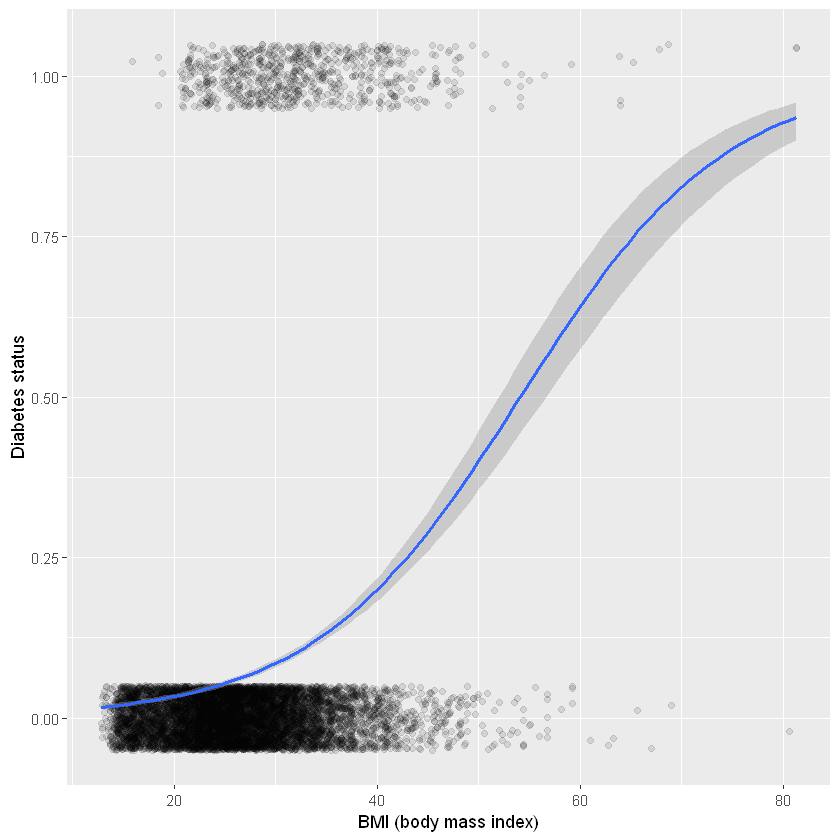

In [27]:
log_plot + aes(x = BMI) + xlab("BMI (body mass index)")

In [28]:
logreg <- glm(has_diabetes ~ BMI + Age, family = "binomial", data = NHANES) 
msummary(logreg)
#summary(logreg)##This is the summary function from the base package

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.080292   0.244447  -33.05   <2e-16 ***
BMI          0.094325   0.005519   17.09   <2e-16 ***
Age          0.057278   0.002487   23.03   <2e-16 ***

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5263.8  on 9628  degrees of freedom
Residual deviance: 4146.0  on 9626  degrees of freedom
  (371 observations deleted due to missingness)
AIC: 4152

Number of Fisher Scoring iterations: 7

## The coefficient for AGE= 0.057278 which is interpreted as the expected change in log odds for a one-unit increase in age. The odds ratio can be calculated by exponentiating this value to get 1.05895 which means we expect to see about 6% increase in the odds of being diabeitc, for a one-unit increase in age score

In [ ]:
odd = exp(0.057278)
prob = odd/(1+odd)
odd
prob

### Which variable is more important?

In [ ]:
ages <- range(~Age, data = NHANES) ##range of ages
bmis <- range(~BMI, data = NHANES, na.rm = TRUE) ##range of BMI
res <- 100 

##Expand the range to 100 rows
fake_grid <- expand.grid(
    Age = seq(from = ages[1], to = ages[2], length.out = res), 
    BMI = seq(from = bmis[1], to = bmis[2], length.out = res)
) 

##Get the probability of diabetis using the model logreg
y_hats <- fake_grid %>%
mutate(y_hat = predict(logreg, newdata = ., type = "response"))

In [ ]:
head(fake_grid)
dim(fake_grid)

In [ ]:
head(y_hats)

In [ ]:
ggplot(data = NHANES, aes(x = Age, y = BMI)) + 
geom_tile(data = y_hats, aes(fill = y_hat), color = NA) + 
geom_count(aes(color = as.factor(has_diabetes)), alpha = 0.4) + 
scale_fill_gradient(low = "white", high = "dodgerblue") + 
scale_color_manual("Diabetes", values = c("gray", "gold")) + 
scale_size(range = c(0, 2))

We see that very few young adults have diabetes, even if they have moderately high BMI scores. As we look at older subjects while holding BMI fixed, the probability of diabetes increases.

## Anova

Anova is also part of the GLM (general linear model) family. It works the same as a linear Regression but instead of one or multiple continuous predictors, In ANOVA we model the response variable (a continuous variable) as a function of one or multiple categorical variables.

For example if we want to predict the duration of breastfeeding in weeks using mother's age as a predictor variable, then you would use a regression model. If you are trying to predict the duration of breastfeeding in weeks using mother's marital status (single, married, divorced, widowed), the you would use an ANOVA model. If you are trying to predict the duration of breastfeeding in weeks using prenatal smoking status (smoked during pregnancy, did not smoke during pregnancy), then you would use a two-sample t-test. If you added delivery type (vaginal/c-section) to prenatal smoking status, then the two binary predictor variables would be analyzed using an ANOVA model. [http://www.pmean.com/08/RegressionAndAnova.html](http://www.pmean.com/08/RegressionAndAnova.html)

The ANOVA models partition the variance using the sum of the squares (SS). In an ANOVA model, the total variation (total SST) is partitioned into variation between groups (between SSB) and variation within groups (within SSW). You can do the same sort of thing for a regression model, partitioning total variation into variation due to the model (model SS) and variation unexplained by the model (error SS).

H0: μ1 = μ2 = μ3 = μ4
H1: The means are not all equal.

Test Statistic for ANOVA

We’ll then decompose the variance, as we’ve seen before in regression. The total variation measures how much the observations vary about the overall sample mean, ignoring the groups.

$SST = \sum_{i = 1}^{g} \sum_{j = 1}^{n_i} (y_{ij} - \bar{y})^2$

$SSB = \sum_{i = 1}^{g} \sum_{j = 1}^{n_i} (\bar{y}_i - \bar{y})^2 = \sum_{i = 1}^{g} n_i (\bar{y}_i - \bar{y})^2$

$SSW = \sum_{i = 1}^{g} \sum_{j = 1}^{n_i} (y_{ij} - \bar{y}_i)^2 = \sum_{i = 1}^{g} (n_i - 1) s_{i}^{2}$


$\bar{y}_i$ is the sample mean of group  

$\bar{y}$  is the overall sample mean.

$s_{i}^{2}$  is the sample variance of group  


To develop the test statistic for ANOVA, we place this information into an ANVOA table.

![title](ANOVA.png)

## Model Assumptions

- The observations are obtained independently and randomly from the population defined by the factor levels
- Factor levels are normally distributed.
- These normal populations have a common variance. (Levene’s test can be used to check this.)

In [1]:
my_data <- PlantGrowth

In [2]:
set.seed(1234)
dplyr::sample_n(my_data, 10)

weight,group
<dbl>,<fct>
6.15,trt2
3.83,trt1
5.29,trt2
5.12,trt2
4.50,ctrl
4.17,trt1
5.87,trt1
5.33,ctrl
5.26,trt2


In [3]:
levels(my_data$group)

[1] "ctrl" "trt1" "trt2"

In [4]:
my_data$group <- ordered(my_data$group,
                         levels = c("ctrl", "trt1", "trt2"))

In [6]:
library(dplyr)
group_by(my_data, group) %>%
  summarise(
    count = n(),
    mean = mean(weight, na.rm = TRUE),
    sd = sd(weight, na.rm = TRUE)
  )

group,count,mean,sd
<ord>,<int>,<dbl>,<dbl>
ctrl,10,5.032,0.5830914
trt1,10,4.661,0.7936757
trt2,10,5.526,0.4425733


Warning message:
"package 'ggpubr' is in use and will not be installed"


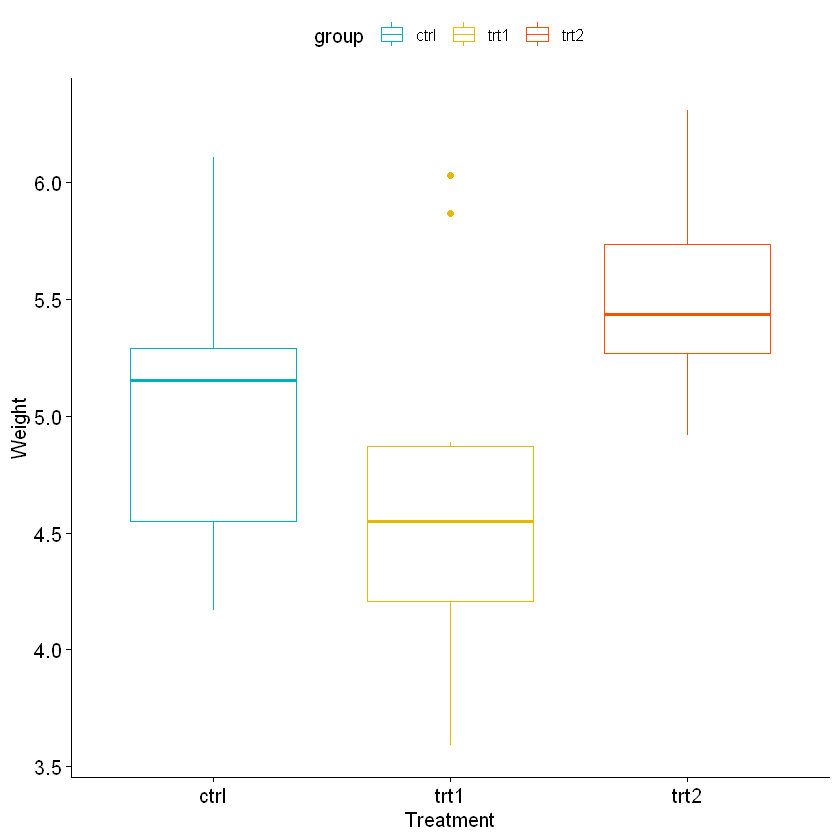

In [9]:
install.packages("ggpubr")
# Box plots
# ++++++++++++++++++++
# Plot weight by group and color by group
library("ggpubr")
ggboxplot(my_data, x = "group", y = "weight", 
          color = "group", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
          order = c("ctrl", "trt1", "trt2"),
          ylab = "Weight", xlab = "Treatment")

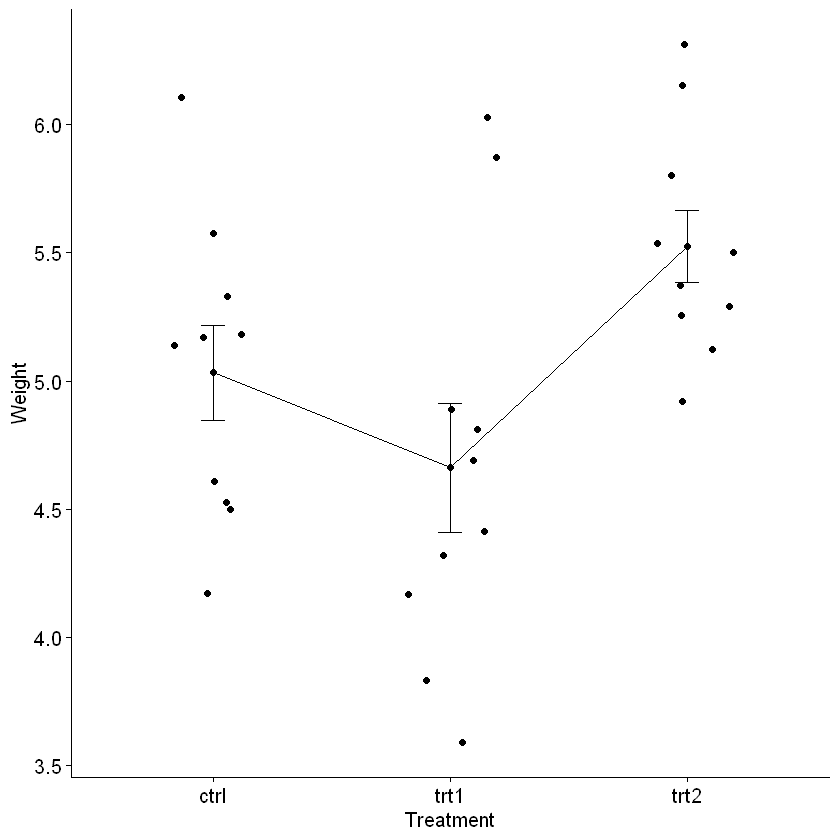

In [10]:
# Mean plots
# ++++++++++++++++++++
# Plot weight by group
# Add error bars: mean_se
# (other values include: mean_sd, mean_ci, median_iqr, ....)
library("ggpubr")
ggline(my_data, x = "group", y = "weight", 
       add = c("mean_se", "jitter"), 
       order = c("ctrl", "trt1", "trt2"),
       ylab = "Weight", xlab = "Treatment")

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""frame" is not a graphical parameter"
Warning message in axis(1, at = 1:length(means), labels = legends, ...):
""frame" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""frame" is not a graphical parameter"


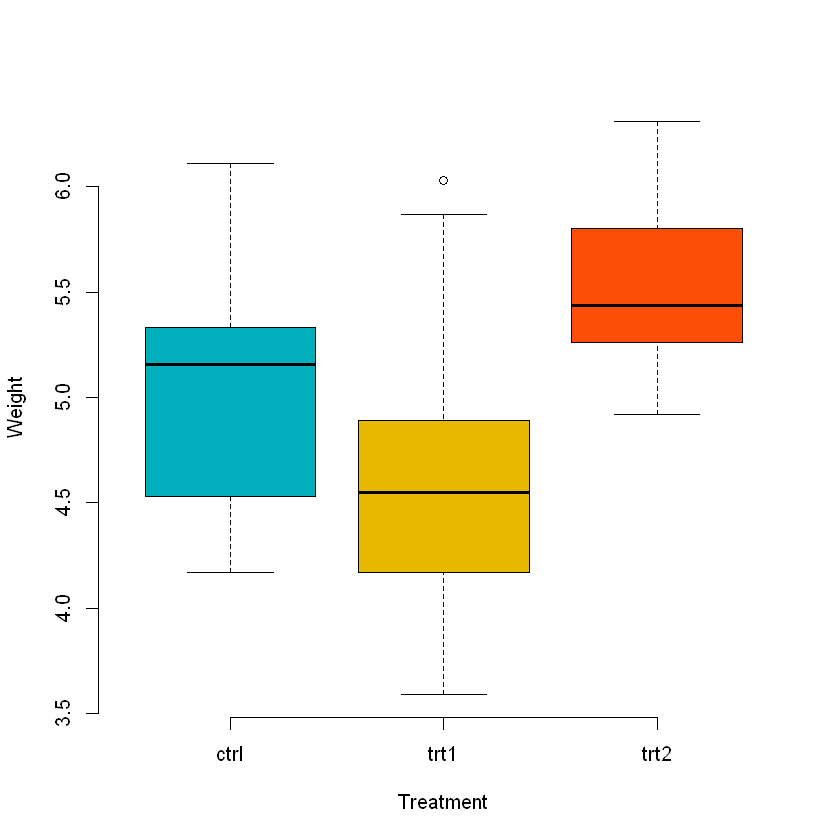

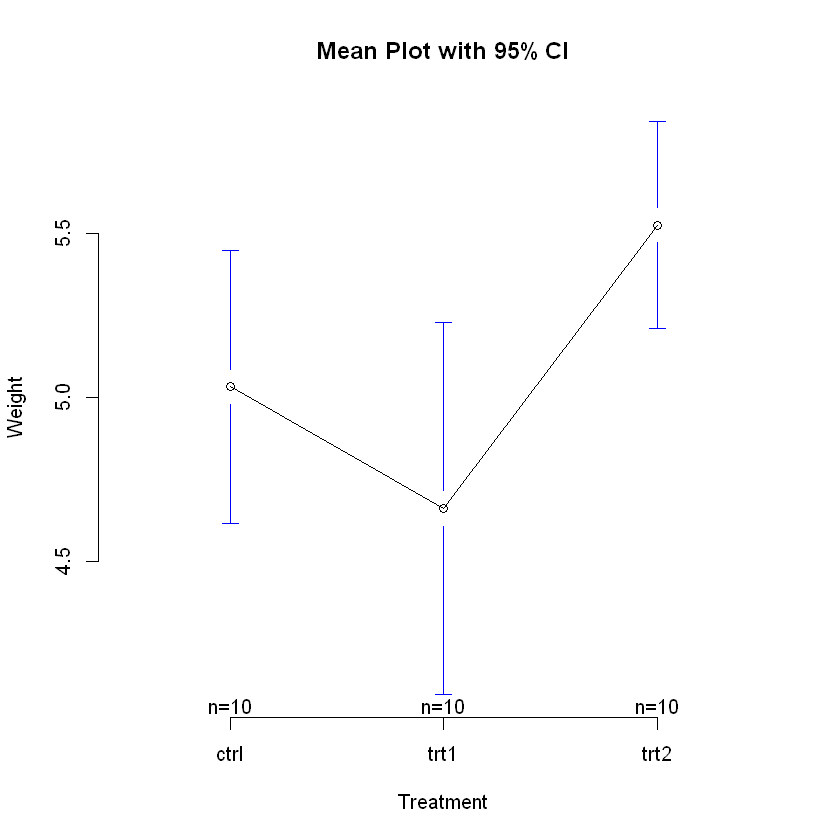

In [14]:
# Box plot
boxplot(weight ~ group, data = my_data,
        xlab = "Treatment", ylab = "Weight",
        frame = FALSE, col = c("#00AFBB", "#E7B800", "#FC4E07"))
# plotmeans
library("gplots")
plotmeans(weight ~ group, data = my_data, frame = FALSE,
          xlab = "Treatment", ylab = "Weight",
          main="Mean Plot with 95% CI") 

In [15]:
# Compute the analysis of variance
res.aov <- aov(weight ~ group, data = my_data)
# Summary of the analysis
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## Multiple pairwise-comparison between the means of groups

The ANOVA summary result shows a significant different in the model, however, we don't know which groups contribute more to this difference. It’s possible to perform multiple pairwise-comparison, to determine if the mean difference between specific pairs of group are statistically significant.

## Tukey multiple pairwise-comparisons
As the ANOVA test is significant, we can compute Tukey HSD (Tukey Honest Significant Differences, R function: TukeyHSD()) for performing multiple pairwise-comparison between the means of groups.

The function TukeyHD() takes the fitted ANOVA as an argument.



In [16]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ group, data = my_data)

$group
            diff        lwr       upr     p adj
trt1-ctrl -0.371 -1.0622161 0.3202161 0.3908711
trt2-ctrl  0.494 -0.1972161 1.1852161 0.1979960
trt2-trt1  0.865  0.1737839 1.5562161 0.0120064


#### A note on multiple pairwise comparisons

In many ocasions we want to test multiple independent or even dependent statistical tests on the same data set (comparing multiple variables, multiple genes, different categorical levels, etc). Why is this a problem?

Let's say you are testing 20 different hypothesis on the same data set, and a significance level of 0.05. What’s the probability of observing at least one significant result just due to chance?

            P (at least one significan result)  = 1 − P(no significant results)

$$ = 1 (1-0.05)^{20} $$
$$ = 0.64 $$

So, with 20 tests being considered, we have a 64% chance of observing at least one significant result, even if all of the tests are actually not significant. In genomics and other biology-related fields, it’s not unusual for the number of simultaneous tests to be quite a bit larger than 20... and the probability of getting a significant result simply due to chance keeps going up.

The Bonferroni correction is an adjustment made to P values when several dependent or independent statistical tests are being performed simultaneously on a single data set. To perform a Bonferroni correction, divide the critical P value (α) by the number of comparisons being made. For example, if 10 hypotheses are being tested, the new critical P value would be α/10. The statistical power of the study is then calculated based on this modified P value.

The Bonferroni correction is used to reduce the chances of obtaining false-positive results (type I errors) when multiple pair wise tests are performed on a single set of data. Put simply, the probability of identifying at least one significant result due to chance increases as more hypotheses are tested.

For more info see [https://www.stat.berkeley.edu/~mgoldman/Section0402.pdf](https://www.stat.berkeley.edu/~mgoldman/Section0402.pdf)

## Assumptions:

1. Homogeneity of variances: Similar to linear models we can check the residuals vs fitted values plot and look for departures from homogeneity. It’s also possible to use Bartlett’s test or Levene’s test to check the homogeneity of variances



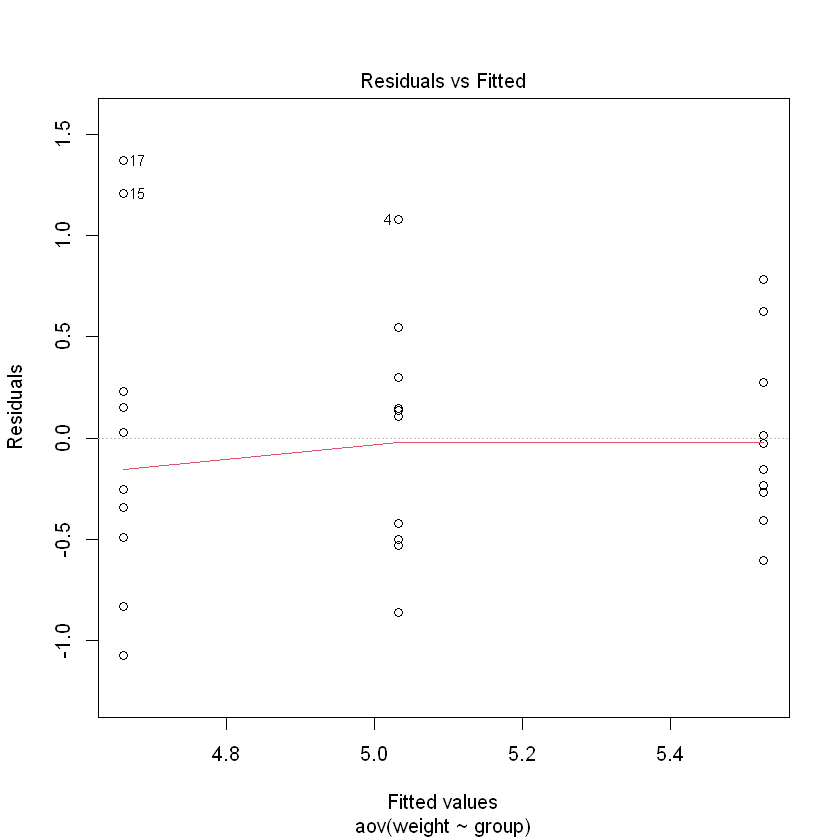

In [17]:
# 1. Homogeneity of variances
plot(res.aov, 1)

In [20]:
library(car)
leveneTest(weight ~ group, data = my_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.119186,0.3412266
,27,NA,NA


$2.$ Normality: We can use a qqplot to evaluate departures from linearity. We can use the Shapiro-Wilk test on the ANOVA residuals

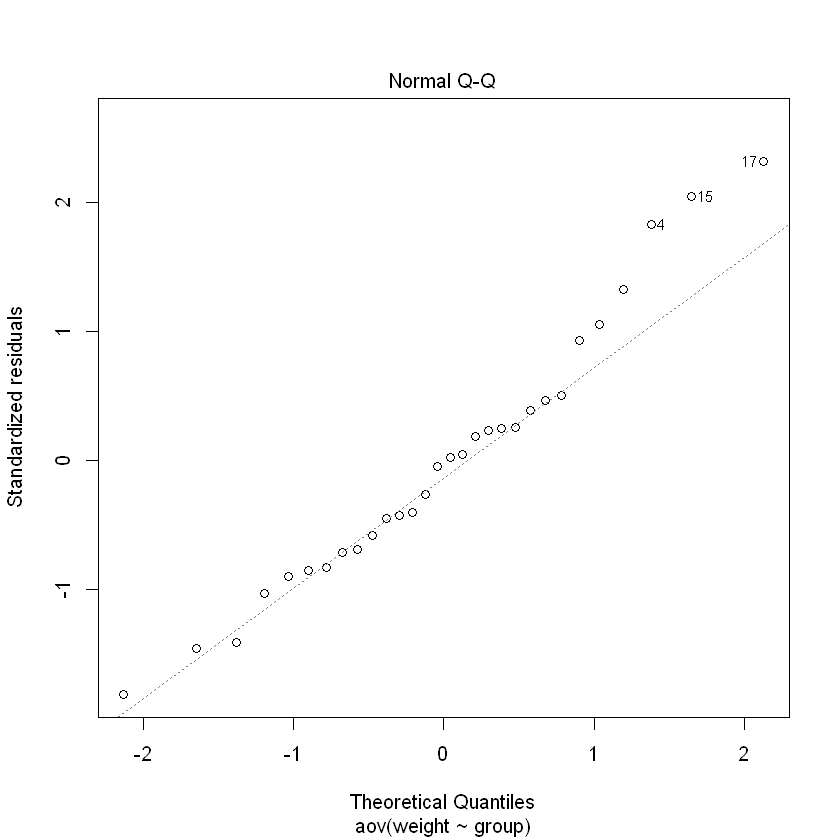

In [21]:
# 2. Normality
plot(res.aov, 2)

In [22]:
# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.96607, p-value = 0.4379


# Model Selection

There are many more models in the family of General Linear Models, and model selection depends on the type of data you are dealing with.

![title](GLM.png)

It is important to not that in many cases we don't which variables need to be added to the model (remember the more variables the larger the samples sizes need to be). There are multiple techniques for variables selection, which we will not cover in this course but that are important to study and apply.

Many of these techniques rely on a systematic inclusion and exclusion of variables to the model and evaluation using the AIC **Akaike information criterion** [https://en.wikipedia.org/wiki/Akaike_information_criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the BIC **Bayesian information criterion**.

Recomended book on GLM:

Beginner's Guide to GLM and GLMM with R (Zuur et al, 2013)